In [1]:
import zipfile
import os

In [2]:
path_rav=os.path.abspath("Ravdess.zip")
extract_path_rav=os.path.abspath("RAVDEES")

In [3]:
import zipfile
import os

zip_file_path = path_rav
extraction_dir = extract_path_rav

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_dir)


In [4]:
Ravdess=extract_path_rav

In [5]:
import librosa 
import resampy

In [65]:
import os
import pandas as pd
import zipfile

zip_file_path = path_rav


extraction_dir = extract_path_rav

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_dir)


ravdess_directory_list = os.listdir(extraction_dir)

file_emotion = []
file_path = []


for dir in ravdess_directory_list:
    actor_files = os.listdir(os.path.join(extraction_dir, dir))
    for file in actor_files:
        part = file.split('.')[0].split('-')
        
        if len(part) >= 3:
            file_emotion.append(int(part[2]))
            file_path.append(os.path.join(extraction_dir, dir, file))

emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

path_df = pd.DataFrame(file_path, columns=['Path'])

Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)

print(Ravdess_df.head())


  Emotions                                               Path
0     fear  /home/student/Desktop/Project_1/RAVDEES/Actor_...
1      sad  /home/student/Desktop/Project_1/RAVDEES/Actor_...
2      sad  /home/student/Desktop/Project_1/RAVDEES/Actor_...
3     calm  /home/student/Desktop/Project_1/RAVDEES/Actor_...
4    happy  /home/student/Desktop/Project_1/RAVDEES/Actor_...


In [66]:
Ravdess_df["Emotions"]

0           fear
1            sad
2            sad
3           calm
4          happy
          ...   
1435    surprise
1436    surprise
1437       happy
1438        calm
1439     disgust
Name: Emotions, Length: 1440, dtype: object

In [67]:
import librosa
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [68]:
def extract_features(file_path):
    try:
        y, sr = librosa.load(file_path, res_type='kaiser_fast') 
        
        mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13), axis=1) 
        chroma = np.mean(librosa.feature.chroma_stft(y=y, sr=sr), axis=1)
        spectral_contrast = np.mean(librosa.feature.spectral_contrast(y=y, sr=sr), axis=1)
        
        feature_vector = np.concatenate((mfccs, chroma, spectral_contrast))
        
        return feature_vector
    
    except Exception as e:
        print(f"Error extracting features from {file_path}: {e}")
        return None

In [69]:
#pip install resampy

In [70]:
df=pd.DataFrame()
df['features'] = Ravdess_df['Path'].apply(extract_features)
df = df.dropna()  
features = np.vstack(df['features'].to_numpy())
feature_columns = [f'feature_{i}' for i in range(features.shape[1])]
df[feature_columns] = pd.DataFrame(features, index=df.index)
df = df.drop(columns=['features'])

In [71]:
df["Emotion"]=Ravdess_df["Emotions"]
df["Path"]=Ravdess_df["Path"]

In [72]:
df.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,Emotion,Path
0,-572.048889,37.360298,-29.548603,5.672988,-14.801066,-5.342034,-10.767773,-13.310300,-9.907030,-3.003237,...,0.391545,13.875924,19.427767,19.146234,17.822675,19.582979,18.977968,37.228984,fear,/home/student/Desktop/Project_1/RAVDEES/Actor_...
1,-664.655823,46.843250,-9.166523,7.020432,-9.046659,-2.075294,-13.637752,-12.076458,-12.880603,-2.498055,...,0.454626,15.748242,16.099912,17.188386,15.485405,16.823901,16.645803,36.912864,sad,/home/student/Desktop/Project_1/RAVDEES/Actor_...
2,-662.293640,50.111103,-12.450682,8.630895,-11.468252,-4.063173,-12.433441,-11.803965,-11.439607,-2.096160,...,0.423399,14.783775,15.241838,16.175223,15.139545,17.127224,16.986184,36.575071,sad,/home/student/Desktop/Project_1/RAVDEES/Actor_...
3,-661.085022,51.473312,-11.968718,12.055676,-9.001163,0.367601,-7.791628,-6.266215,-5.900336,-0.835680,...,0.411789,16.589923,17.294897,17.817141,16.739032,17.950664,16.401031,36.456726,calm,/home/student/Desktop/Project_1/RAVDEES/Actor_...
4,-537.868896,39.565235,-25.893286,7.238036,-11.774881,-9.651143,-12.100254,-11.564373,-8.967941,-3.410729,...,0.377823,18.471493,19.655088,19.715219,17.150978,17.539550,19.192321,36.033033,happy,/home/student/Desktop/Project_1/RAVDEES/Actor_...


In [73]:
data_final=pd.concat([df[df["Emotion"]=="sad"],df[df["Emotion"]=="happy"]])

In [74]:
data_final=data_final.sample(frac=1)

In [75]:
data_final["Emotion"]=data_final["Emotion"].replace({"sad":1,"happy":0})

In [76]:
data_final.index=np.arange(len(data_final))

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
x_train,x_test,y_train,y_test=train_test_split(data_final.drop(["Emotion","Path"],axis=1),data_final["Emotion"],test_size=0.3)

In [79]:
data_angry=df[df["Emotion"]=="angry"]

In [80]:
data_angry

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,Emotion,Path
7,-445.752136,33.328201,-26.756344,6.289474,-17.926224,-4.860417,-5.671055,-10.964885,-5.198429,-1.960446,...,0.295203,15.729811,17.338488,19.150267,17.594726,19.091384,19.289076,35.591054,angry,/home/student/Desktop/Project_1/RAVDEES/Actor_...
9,-564.705078,46.857140,-13.451058,9.051428,-9.255362,-1.851770,-6.451795,-7.595262,-6.947702,0.118934,...,0.416847,15.879659,16.008790,17.000992,15.255397,17.254861,16.754253,35.173106,angry,/home/student/Desktop/Project_1/RAVDEES/Actor_...
15,-470.403076,36.803448,-27.826307,6.503961,-18.423082,-3.856059,-3.030208,-9.690592,-7.044393,-1.942847,...,0.404227,14.258521,16.868259,17.643417,17.057062,18.322371,18.894074,36.007501,angry,/home/student/Desktop/Project_1/RAVDEES/Actor_...
16,-418.765900,27.348452,-34.374428,1.323039,-22.571722,-7.932917,-6.583715,-13.997959,-9.075407,-4.054024,...,0.374769,15.536898,17.663268,19.652624,17.630105,19.233238,19.591497,36.315921,angry,/home/student/Desktop/Project_1/RAVDEES/Actor_...
33,-425.499084,29.809498,-34.851524,-0.374695,-22.370771,-8.782079,-7.922184,-14.657335,-10.780755,-4.013135,...,0.461037,14.405835,17.098721,18.230202,15.997290,17.614854,18.855261,37.472388,angry,/home/student/Desktop/Project_1/RAVDEES/Actor_...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1405,-330.671417,45.507645,-18.195965,14.346995,-9.726501,1.191126,-11.882738,-10.507249,-10.240137,-1.324012,...,0.415204,19.995070,15.344786,17.050560,16.857039,17.684315,17.863109,38.961227,angry,/home/student/Desktop/Project_1/RAVDEES/Actor_...
1407,-339.917389,47.428860,-23.541597,15.422274,-16.665073,2.442569,-10.693023,-11.050249,-9.468793,-2.823936,...,0.482324,21.188235,16.410777,17.992365,16.423149,17.765319,18.294253,39.050529,angry,/home/student/Desktop/Project_1/RAVDEES/Actor_...
1425,-353.061340,52.146942,-18.570066,11.543411,-14.719998,1.043629,-10.581989,-11.250591,-12.914920,-1.590643,...,0.467301,19.798772,15.061491,16.014195,15.861045,16.870262,18.679533,38.946242,angry,/home/student/Desktop/Project_1/RAVDEES/Actor_...
1432,-616.384216,72.894478,-2.847231,24.217739,0.676307,4.176740,-12.327419,-5.976156,-11.165399,0.328241,...,0.512706,19.929499,12.890176,15.762402,14.349765,16.333503,17.131584,38.670934,angry,/home/student/Desktop/Project_1/RAVDEES/Actor_...


In [81]:
from sklearn.preprocessing import MinMaxScaler

In [82]:
scaler=MinMaxScaler()

In [83]:
scaler.fit(x_train)

MinMaxScaler()

In [84]:
x_train=scaler.transform(x_train)

In [85]:
x_test=scaler.transform(x_test)

In [86]:
from sklearn.neighbors import KNeighborsClassifier

In [87]:
model_knn=KNeighborsClassifier(n_neighbors=3,metric="euclidean")

In [88]:
score=[]
for i in range(2,21):
    model_knn=KNeighborsClassifier(n_neighbors=i,metric="euclidean")
    model_knn.fit(x_train,y_train)
    score.append(model_knn.score(x_test,y_test))

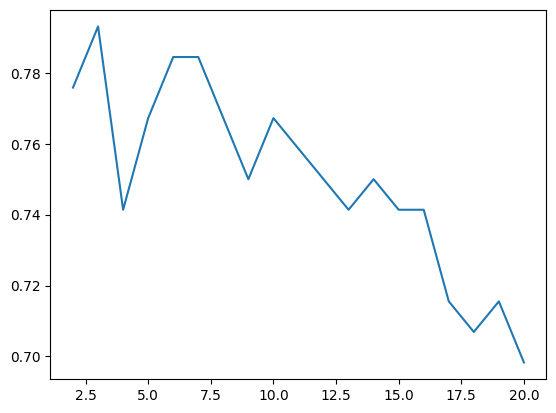

In [89]:
plt.plot([i for i in range(2,21)],score)

In [90]:
scaler=MinMaxScaler()

In [91]:
scaler.fit(data_final.drop(["Emotion","Path"],axis=1))

MinMaxScaler()

In [92]:
data_fin_trnsfrm=scaler.transform(data_final.drop(["Emotion","Path"],axis=1))

In [93]:
data=pd.DataFrame(data_fin_trnsfrm,columns=data_final.drop(["Emotion","Path"],axis=1).columns)

In [94]:
data["Emotion"]=data_final["Emotion"]
data["Path"]=data_final["Path"]

In [95]:
data

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,Emotion,Path
0,0.478475,0.501258,0.629201,0.635199,0.509901,0.515147,0.458079,0.528510,0.302246,0.517740,...,0.817569,0.641931,0.303493,0.334757,0.228115,0.184616,0.399077,0.750737,1,/home/student/Desktop/Project_1/RAVDEES/Actor_...
1,0.379721,0.709064,0.723149,0.760529,0.463909,0.916870,0.648063,0.724193,0.681554,0.709626,...,0.634571,0.892085,0.424724,0.384614,0.328705,0.429658,0.195784,0.777209,0,/home/student/Desktop/Project_1/RAVDEES/Actor_...
2,0.682425,0.161376,0.389890,0.240628,0.046985,0.253801,0.288628,0.523458,0.517510,0.510636,...,0.296098,0.139722,1.000000,0.745936,0.679225,0.520081,0.439388,0.651614,0,/home/student/Desktop/Project_1/RAVDEES/Actor_...
3,0.363852,0.414471,0.613401,0.400516,0.313016,0.456424,0.372198,0.308823,0.549431,0.463763,...,0.417862,0.257853,0.546854,0.455142,0.298680,0.371976,0.230598,0.567149,1,/home/student/Desktop/Project_1/RAVDEES/Actor_...
4,0.377464,0.617013,0.687821,0.635259,0.737476,0.574604,0.663724,0.811486,0.760805,0.626335,...,0.605995,0.531072,0.208757,0.087620,0.225087,0.215206,0.237453,0.793189,0,/home/student/Desktop/Project_1/RAVDEES/Actor_...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,0.228289,0.574513,0.526005,0.723327,0.522816,0.386786,0.258604,0.525526,0.791171,0.693273,...,0.548638,0.303812,0.648446,0.529481,0.511440,0.572061,0.253626,0.763782,1,/home/student/Desktop/Project_1/RAVDEES/Actor_...
380,0.338830,0.249651,0.494180,0.298546,0.292959,0.356339,0.403530,0.266189,0.609067,0.425297,...,0.217577,0.409389,0.892886,0.638197,0.556893,0.520032,0.404539,0.485665,0,/home/student/Desktop/Project_1/RAVDEES/Actor_...
381,0.783800,0.059945,0.009645,0.213040,0.227654,0.065859,0.141300,0.365037,0.394519,0.771188,...,0.411432,0.843813,0.379945,0.895696,0.760206,0.871941,0.828694,0.859963,0,/home/student/Desktop/Project_1/RAVDEES/Actor_...
382,0.382577,0.424394,0.733588,0.430560,0.572562,0.617140,0.528847,0.574962,0.559856,0.478933,...,0.406750,0.568067,0.335430,0.255915,0.146611,0.255008,0.136583,0.718307,1,/home/student/Desktop/Project_1/RAVDEES/Actor_...


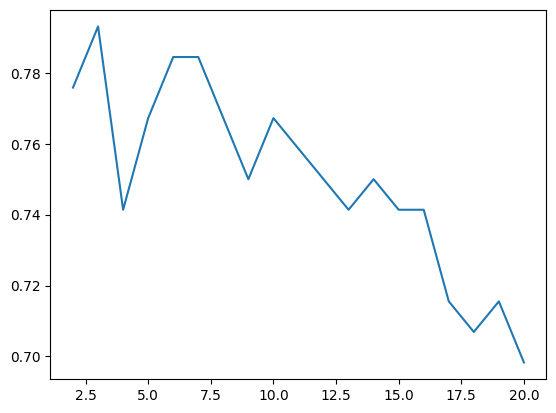

In [96]:
plt.plot([i for i in range(2,21)],score)

In [97]:
model_knn=KNeighborsClassifier(n_neighbors=5)

In [98]:
model_knn.fit(x_train,y_train)

KNeighborsClassifier()

In [99]:
model_knn.score(x_test,y_test)

0.7672413793103449

In [100]:
data_agress=data_final.copy()

In [101]:
data_agress=pd.concat([df[df["Emotion"]=="happy"],df[df["Emotion"]=="sad"],df[df["Emotion"]=="angry"]])

In [102]:
data_agress.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,Emotion,Path
4,-537.868896,39.565235,-25.893286,7.238036,-11.774881,-9.651143,-12.100254,-11.564373,-8.967941,-3.410729,...,0.377823,18.471493,19.655088,19.715219,17.150978,17.539550,19.192321,36.033033,happy,/home/student/Desktop/Project_1/RAVDEES/Actor_...
5,-606.964233,48.337757,-21.125084,15.224246,-9.540316,-3.584417,-7.458154,-9.768351,-6.226630,-1.642972,...,0.490886,15.542578,15.850548,17.113257,15.170758,17.045151,17.248370,37.926439,happy,/home/student/Desktop/Project_1/RAVDEES/Actor_...
6,-595.087219,49.440430,-18.437618,11.363368,-8.988585,-3.375666,-11.219616,-10.409492,-5.453844,0.045548,...,0.519148,16.900763,15.851734,17.243086,15.612144,17.112902,17.143092,38.976390,happy,/home/student/Desktop/Project_1/RAVDEES/Actor_...
19,-486.041321,38.946201,-33.810310,9.095350,-12.476110,-12.699355,-11.077549,-11.350236,-7.609620,-3.513916,...,0.482828,16.001132,17.834055,17.867326,15.767746,16.631763,18.650724,37.548066,happy,/home/student/Desktop/Project_1/RAVDEES/Actor_...
46,-487.744568,35.360985,-32.994576,9.933768,-14.339435,-11.957777,-9.600950,-12.980975,-6.477350,-5.562888,...,0.379478,15.398681,19.072036,18.768324,16.530275,17.062072,19.173687,35.384702,happy,/home/student/Desktop/Project_1/RAVDEES/Actor_...


In [103]:
data_agress=data_agress.sample(frac=1)

In [105]:
data_agress["Emotion"]=data_agress["Emotion"].replace({"happy":0,"sad":0,"angry":1})

In [106]:
x_train_agress,x_test_agress,y_train_agress,y_test_agress=train_test_split(data_agress.drop(["Emotion","Path"],axis=1),data_agress["Emotion"])

In [107]:
scaler_agress=MinMaxScaler()

In [108]:
scaler_agress.fit(x_train_agress)

MinMaxScaler()

In [109]:
x_train_agress=scaler.transform(x_train_agress)

In [110]:
x_test_agress=scaler.transform(x_test_agress)

In [111]:
from sklearn.neighbors import KNeighborsClassifier

In [112]:
model_agress=KNeighborsClassifier()

In [113]:
model_agress.fit(x_train_agress,y_train_agress)

KNeighborsClassifier()

In [114]:
x_train_agress

array([[ 0.69606679,  0.44681419,  0.5475452 , ...,  0.5935038 ,
         0.51049078,  0.72487317],
       [ 0.72911103,  0.32742143,  0.28913876, ...,  0.34559848,
         0.47658696,  0.63383752],
       [ 0.97458023,  0.14645159,  0.51859134, ...,  0.49901721,
         0.24726293,  0.88717223],
       ...,
       [ 0.43203437,  0.44457633,  0.53434714, ...,  0.2232932 ,
         0.13338173,  0.70377038],
       [ 0.96474948, -0.07845369,  0.26159617, ...,  0.73554651,
         0.44324962,  0.88836544],
       [ 0.6767686 ,  0.11815311,  0.16273749, ...,  0.97247172,
         0.93646009,  0.86828551]])

In [115]:
model_agress.fit(x_train_agress,y_train_agress)

KNeighborsClassifier()

In [116]:
model_agress.score(x_train_agress,y_train_agress)

0.8935185185185185

In [117]:
model_agress.score(x_test_agress,y_test_agress)

0.7847222222222222

In [118]:
import warnings



In [119]:
def predict(file_name):
    audio_path=os.path.abspath(file_name)
    features=extract_features(audio_path)
    from sklearn.preprocessing import MinMaxScaler
    scaler_predict=MinMaxScaler()
    features=scaler_predict.fit_transform(features.reshape(1,-1))
    emotion=model_knn.predict(features)
    agressive=model_agress.predict(features)
    Emo=""
    Agr=""
    if emotion==0 :
        Emo="Happy"
    elif emotion==1:
        Emo="Sad"
    if agressive==1:
        Agr="Agressive"
    elif agressive==0:
        Agr="Non-Agressive"
    return [Emo,Agr]

In [120]:
def Audio_Input():
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore")
    print("Enter the File Name to input Audio File")
    file_name=input()
    folder_path=os.path.abspath(file_name)
    audio_files = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.wav') or file.endswith('.mp3')]
    result=pd.DataFrame()
    emot=[]
    agress=[]
    result["Audio"]=audio_files
    for i in audio_files:
        res=predict(i)
        emot.append(res[0])
        agress.append(res[1])
    result["Emotion"]=emot
    result["Agression"]=agress
    return result

In [121]:
Audio_Input()

Enter the File Name to input Audio File


 Test


,Audio,Emotion,Agression
0,/home/student/Desktop/Project_1/Test/OAF_beg_s...,Happy,Non-Agressive
1,/home/student/Desktop/Project_1/Test/OAF_back_...,Happy,Non-Agressive
2,/home/student/Desktop/Project_1/Test/OAF_bath_...,Happy,Non-Agressive
3,/home/student/Desktop/Project_1/Test/OAF_came_...,Happy,Non-Agressive
4,/home/student/Desktop/Project_1/Test/OAF_bite_...,Happy,Non-Agressive
5,/home/student/Desktop/Project_1/Test/OAF_base_...,Happy,Non-Agressive
6,/home/student/Desktop/Project_1/Test/OAF_bean_...,Happy,Non-Agressive
7,/home/student/Desktop/Project_1/Test/OAF_cab_s...,Happy,Non-Agressive
8,/home/student/Desktop/Project_1/Test/OAF_base_...,Happy,Non-Agressive
9,/home/student/Desktop/Project_1/Test/OAF_bean_...,Happy,Non-Agressive
